# **Importing Necessary Modules**

---



In [530]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Dataset**

---



In [531]:
df = pd.read_csv("st_train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [533]:
df.shape

(8693, 14)

In [534]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [535]:
df["VIP"].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [536]:
df["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

# **Check for NULL Values**

---



In [537]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [538]:
df = df.drop("Name", axis=1)

In [539]:
df.shape

(8693, 13)

In [540]:
for i in df.columns:

  if( df[i].isnull().any()==True):

    df[i] = df[i].fillna(df[i].mode()[0])

In [541]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

# **Data Visualisation**

---



<Axes: xlabel='Age', ylabel='Count'>

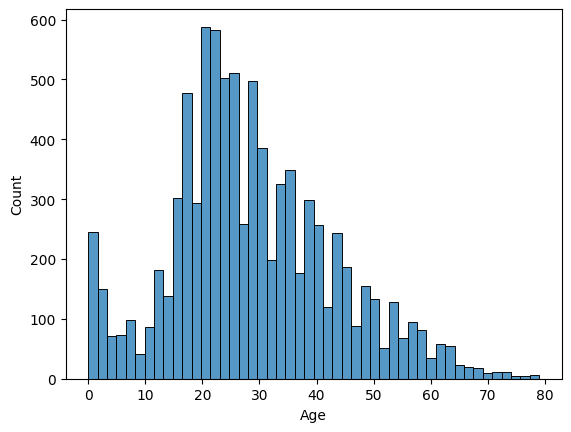

In [542]:
sns.histplot(df["Age"])

<Axes: xlabel='VIP', ylabel='count'>

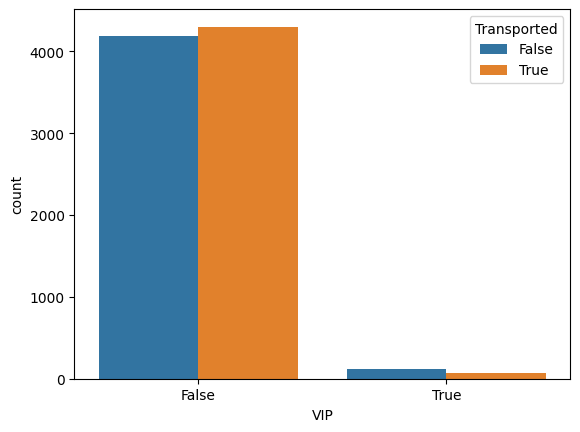

In [543]:
sns.countplot(x="VIP", data=df, hue="Transported")

<Axes: xlabel='HomePlanet', ylabel='count'>

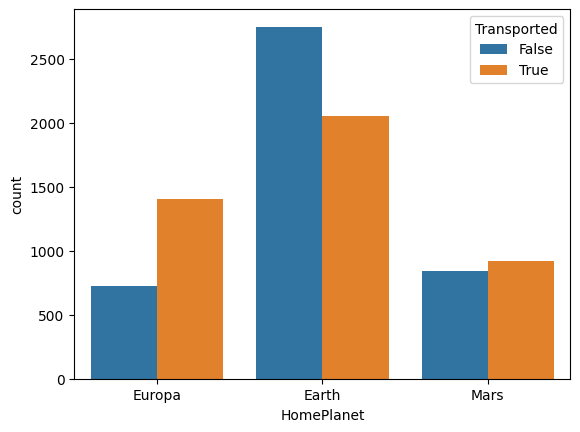

In [544]:
sns.countplot(x="HomePlanet", data=df, hue="Transported")

<Axes: xlabel='Destination', ylabel='count'>

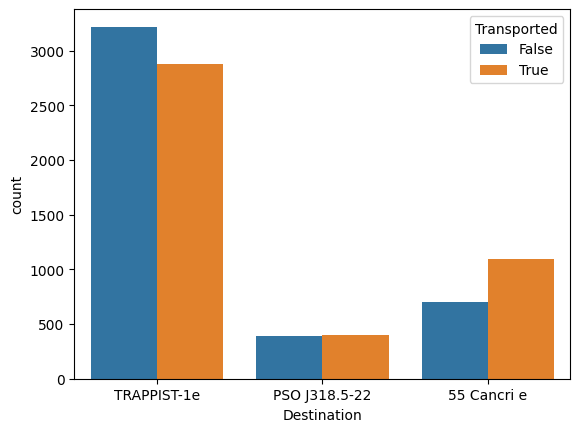

In [545]:
sns.countplot(x="Destination", data=df, hue="Transported")

<Axes: >

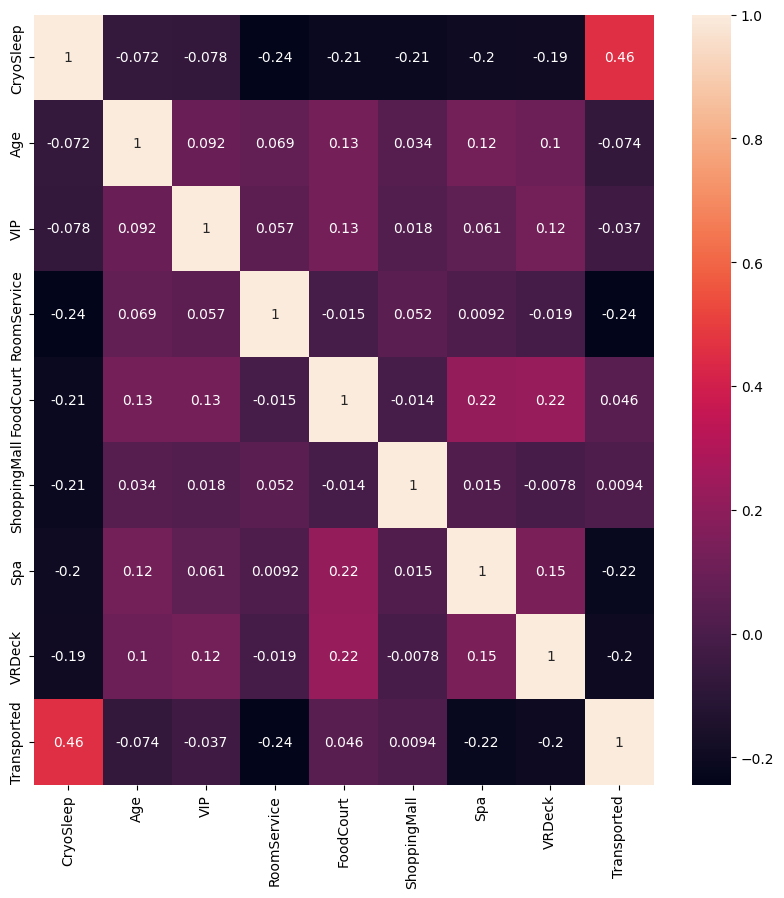

In [546]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

# **Outlier Detection**

---



<Axes: >

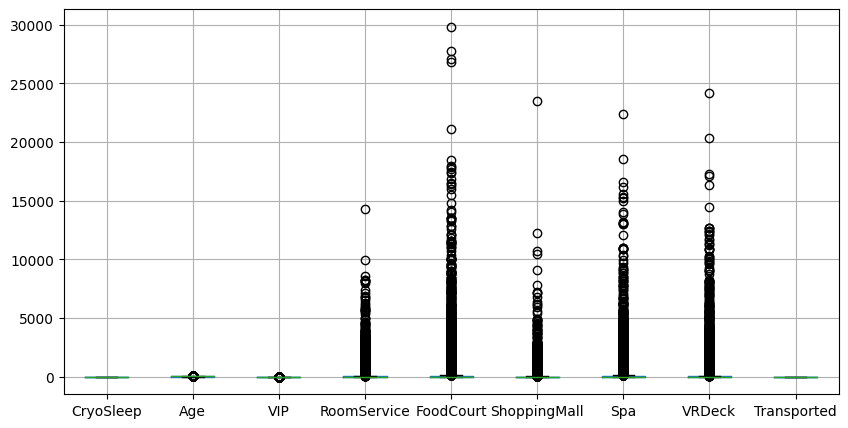

In [547]:
plt.figure(figsize=(10,5))
df.boxplot()

# **Seperating Dependent & Independent Variables**

---



In [548]:
X = df.drop("Transported", axis=1)
y = df["Transported"]

In [549]:
X[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)

In [550]:
drop_cols = ["PassengerId", "Cabin",  "Cabin_num"]

In [551]:
X = X.drop(drop_cols, axis=1)

In [552]:
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,S


# **Encoding**

---



In [553]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Deck          8693 non-null   object 
 11  Side          8693 non-null   object 
dtypes: bool(2), float64(6), object(4)
memory usage: 696.2+ KB


In [554]:
cat_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP", "Deck", "Side"]

In [555]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [556]:
enc = dict()
for i in cat_cols:

  enc[i] = LabelEncoder()
  X[i] = enc[i].fit_transform(X[i])

In [557]:
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,5,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,5,1


# **Splitting into Training & Testing Set**

---



In [558]:
from sklearn.model_selection import train_test_split

In [559]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Model Building - Decision Tree Classifier**

---



In [560]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()

In [561]:
from sklearn.model_selection import RandomizedSearchCV

In [562]:
dtc_params = {'max_depth': list(range(10, 15)),
               'max_features': list(range(2,14))}

In [563]:
dtc_cv = RandomizedSearchCV(estimator=dtc_model,
                            param_distributions=dtc_params,
                            cv=10)

In [564]:
dtc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [10, 11, 12, 13, 14],
                                        'max_features': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 13]})

In [565]:
dtc_cv.best_params_

{'max_features': 9, 'max_depth': 11}

In [566]:
dtc_model = DecisionTreeClassifier(max_features=8, max_depth=10)

In [567]:
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=8)

In [568]:
dtc_model.score(X_test, y_test)

0.7630822311673375

In [569]:
y_preds1 = dtc_model.predict(X_test)

In [570]:
from sklearn.metrics import classification_report

In [571]:
print(classification_report(y_test, y_preds1))

              precision    recall  f1-score   support

       False       0.73      0.82      0.77       863
        True       0.80      0.71      0.75       876

    accuracy                           0.76      1739
   macro avg       0.77      0.76      0.76      1739
weighted avg       0.77      0.76      0.76      1739



# **Model Building - XGBClassifier**

---



In [572]:
from xgboost import XGBClassifier
xgbc_model = XGBClassifier()

In [573]:
from sklearn.model_selection import RandomizedSearchCV

In [574]:
xgbc_params = {'gamma' :[i/10.0 for i in range(0,5)],
               'max_depth' : [2,4,6,8,10,12,13,15],
               'min_child_weight':[1,2,5,10],
               'max_delta_step':[0,1,2,5,10],
               'subsample' :[i/10.0 for i in range(5,10)],
               'colsample_bytree' :[i/10.0 for i in range(5,10)],
               'colsample_bylevel' :[i/10.0 for i in range(5,10)],
               'n_estimators' : [100,150,200,300]
               }

In [575]:
xgbc_cv = RandomizedSearchCV(estimator=xgbc_model,
                            param_distributions=xgbc_params,
                            cv=10)

In [576]:
xgbc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bylevel': [0.5, 0.6, 0.7,
                                                              0.8, 0.9],
                                        'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'max_delta_step': [0, 1, 2, 5, 10],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 13,
                                                      15],
                                        'min_child_weight': [1, 2, 5, 10],
                                        'n_estimators': [100, 150, 200, 300],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]})

In [577]:
xgbc_cv.best_params_

{'subsample': 0.9,
 'n_estimators': 300,
 'min_child_weight': 10,
 'max_depth': 4,
 'max_delta_step': 2,
 'gamma': 0.2,
 'colsample_bytree': 0.9,
 'colsample_bylevel': 0.5}

In [578]:
xgbc_model = XGBClassifier( subsample = 0.7,
                           n_estimators = 100,
                            min_child_weight = 10,
                            max_depth = 8,
                            max_delta_step = 10,
                            gamma = 0.0,
                            colsample_bytree = 0.8,
                            colsample_bylevel = 0.9
)

In [579]:
xgbc_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=10,
              max_depth=8, max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [580]:
xgbc_model.score(X_test, y_test)

0.7958596894767107

In [581]:
y_preds2 = xgbc_model.predict(X_test)

In [582]:
from sklearn.metrics import classification_report

In [583]:
print(classification_report(y_test, y_preds2))

              precision    recall  f1-score   support

       False       0.81      0.77      0.79       863
        True       0.78      0.83      0.80       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



# **Model Building - Random Forest Classifier**

---



In [584]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [585]:
from sklearn.model_selection import RandomizedSearchCV

In [586]:
rfc_params = {'max_depth': list(range(10, 15)),
               'max_features': list(range(2,14))}

In [587]:
rfc_cv = RandomizedSearchCV(estimator=rfc_model,
                            param_distributions=rfc_params,
                            cv=10)

In [588]:
rfc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 11, 12, 13, 14],
                                        'max_features': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 13]})

In [589]:
rfc_cv.best_params_

{'max_features': 3, 'max_depth': 12}

In [590]:
rfc_model = RandomForestClassifier(
    max_features=2, max_depth=13
)

In [591]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, max_features=2)

In [592]:
rfc_model.score(X_test, y_test)

0.7993099482461185

In [593]:
y_preds3 = rfc_model.predict(X_test)

In [594]:
from sklearn.metrics import classification_report

In [595]:
print(classification_report(y_test, y_preds3))

              precision    recall  f1-score   support

       False       0.80      0.80      0.80       863
        True       0.80      0.80      0.80       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



# **Testing Data**

---



In [596]:
test_df = pd.read_csv("st_test.csv")

In [597]:
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [598]:
test_df  = test_df.drop("Name", axis=1)

In [599]:
for i in test_df.columns:

  if( test_df[i].isnull().any()==True):

    test_df[i] = df[i].fillna(test_df[i].mode()[0])

In [600]:
test_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [601]:
test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)

In [602]:
X_subs = test_df.drop(drop_cols, axis=1)

In [603]:
for i in cat_cols:

  X_subs[i] = enc[i].transform(X_subs[i])

In [604]:
y_subs1 = dtc_model.predict(X_subs)

In [605]:
subs1 = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Transported": y_subs1
})

In [606]:
subs1.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [607]:
subs1.to_csv("submission1.csv", index=False)

In [608]:
y_subs2 = xgbc_model.predict(X_subs)

In [609]:
subs2 = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Transported": y_subs2
})

In [610]:
subs2["Transported"] = subs2["Transported"].map({0:False, 1:True})

In [611]:
subs2.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [612]:
subs2.to_csv("submission2.csv", index=False)

In [613]:
y_subs3 = rfc_model.predict(X_subs)

In [614]:
subs3 = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Transported": y_subs3
})

In [615]:
subs3.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [616]:
subs3.to_csv("submission3.csv", index=False)

# **Tensorflow Random Forests**

---



In [617]:
!pip install tensorflow_decision_forests

In [618]:
import tensorflow_decision_forests as tfdf
model = tfdf.keras.RandomForestModel()

Use /tmp/tmpie1p1uhe as temporary training directory


In [620]:
train_df = X
#train_df = train_df.drop("Cabin_num")
train_df["Transported"] = y

In [622]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,False
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,5,1,True
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,False
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,False
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,5,1,True


In [621]:
train_tf = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="Transported")

In [624]:
rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1@v1")

Resolve hyper-parameter template "benchmark_rank1@v1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpsgc1df_m as temporary training directory


In [625]:
rf.compile(metrics=["accuracy"])

In [626]:
rf.fit(x=train_tf)

Reading training dataset...
Training dataset read in 0:00:01.466646. Found 8693 examples.
Training model...
Model trained in 0:00:19.014177
Compiling model...
Model compiled.


In [627]:
X_subs.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,5,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,5,1


In [628]:
test_tf = tfdf.keras.pd_dataframe_to_tf_dataset(X_subs)

In [629]:
y_preds4 = rf.predict(test_tf)

5/5 [==============================] - 1s 106ms/step


In [630]:
y_preds4 = (y_preds4 > 0.5).astype(bool)
subs4 = pd.DataFrame({'PassengerId': test_df["PassengerId"],
                       'Transported': y_preds4.squeeze()})

In [631]:
subs4.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [633]:
subs4.to_csv("submission4.csv", index=False)